In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
# read in shape file with ZCTA for NYC
gdf_zip_code_map = gpd.read_file('C:\\Users\\abonc\\OneDrive\\Documents\\GitHub\\urban_data_project\\analysis\\shapefile\\Modified Zip Code Tabulation Areas (MODZCTA).zip')

gdf_zip_code_map = gdf_zip_code_map[['modzcta','geometry']]
gdf_zip_code_map

,modzcta,geometry
0,10001,"POLYGON ((-73.98774 40.74407, -73.98819 40.743..."
1,10002,"POLYGON ((-73.99750 40.71407, -73.99709 40.714..."
2,10003,"POLYGON ((-73.98864 40.72293, -73.98876 40.722..."
3,10026,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ..."
4,10004,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ..."
...,...,...
173,11434,"POLYGON ((-73.75461 40.64720, -73.75380 40.646..."
174,11435,"POLYGON ((-73.80577 40.68293, -73.80606 40.683..."
175,11694,"POLYGON ((-73.86496 40.56663, -73.86558 40.567..."
176,11697,"POLYGON ((-73.86289 40.57606, -73.86281 40.575..."


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_facecolor'

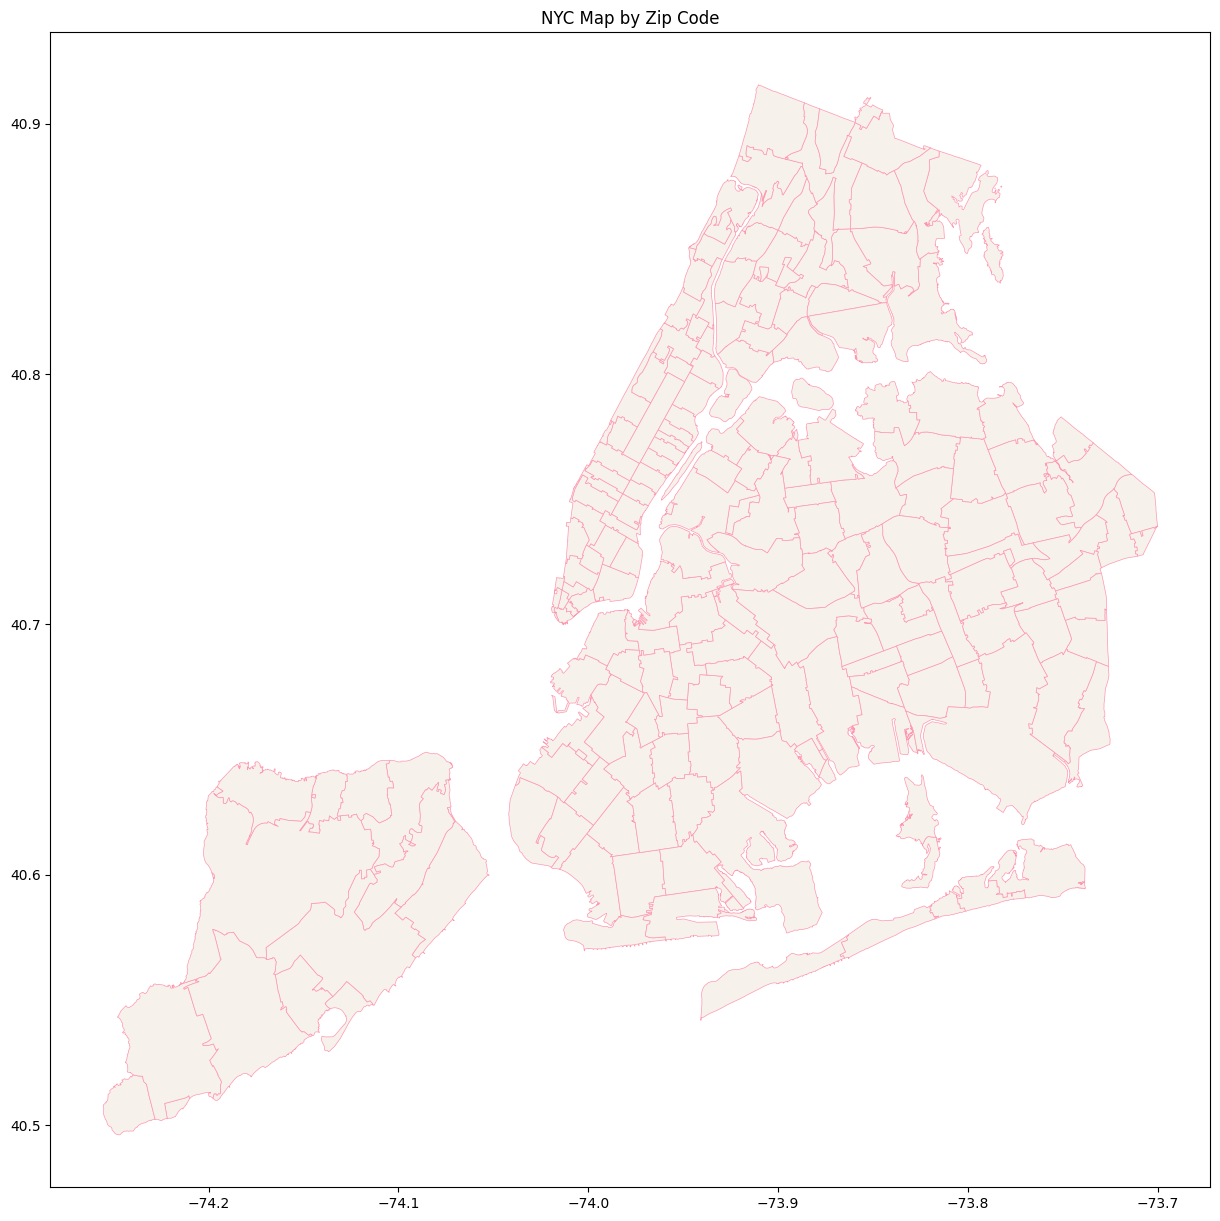

In [42]:
# plot NYC zip codes on map
gdf_zip_code_map.plot(figsize=[15,15],color='#f7f1ebff',linewidth=0.5, edgecolor='#fe98b1').set(title='NYC Map by Zip Code')

plt.tick_params(left = False, right = False , labelleft = False,
                labelbottom = False, bottom = False)
plt.show()

In [58]:
# read in census gentrification metric csv
df_gentrification_metric = pd.read_csv('C:\\Users\\abonc\\OneDrive\\Documents\\GitHub\\urban_data_project\\analysis\\removena\\remove_na_vals.csv')

df_gentrification_metric['NAME']=df_gentrification_metric['NAME'].astype(str)
df_gentrification_metric.rename(columns={'NAME':'Zip Code'},inplace=True)

df_gentrification_metric

,Zip Code,gentrification_metric
0,10001,-0.111938
1,10002,-4.279068
2,10003,0.935428
3,10004,4.003314
4,10005,9.319955
...,...,...
225,11691,1.994904
226,11692,0.110131
227,11693,-0.402690
228,11694,1.256590


In [49]:
# merge NYC zip code shape file with gentrification metric dataframe
gdf_map_gentrification = pd.merge(gdf_zip_code_map, df_gentrification_metric, left_on='modzcta', right_on='Zip Code', how='left')

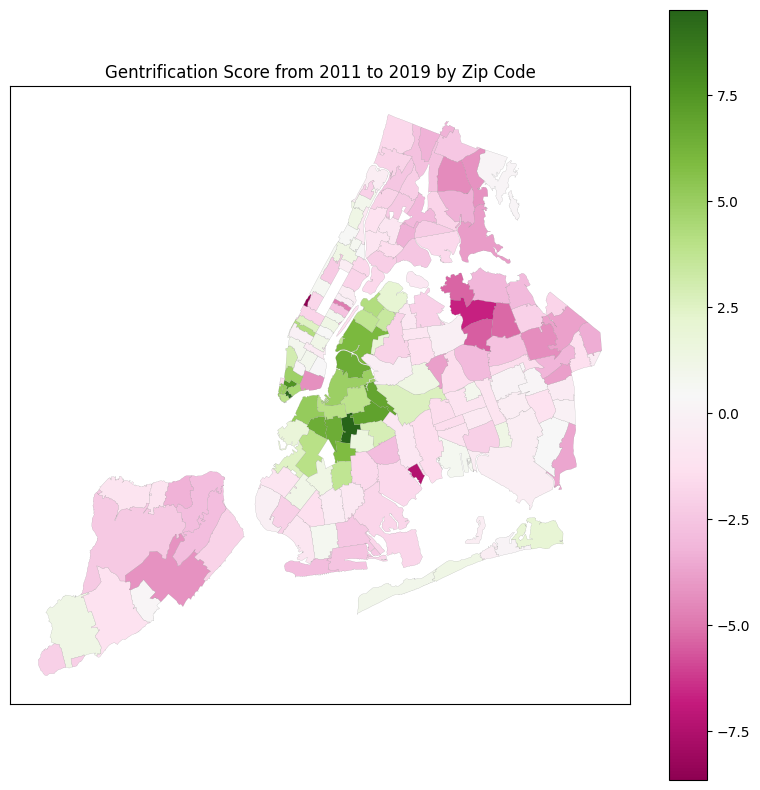

In [56]:
gdf_map_gentrification.plot(column='gentrification_metric',legend=True,figsize=[10,10], cmap='PiYG',linewidth=0.1, edgecolor='grey').set(title='Gentrification Score from 2011 to 2019 by Zip Code')
plt.tick_params(left = False, right = False , labelleft = False,
                labelbottom = False, bottom = False)
plt.show()

In [69]:
# Astoria Gentrification factors
astoria_zip = ['11101', '11102', '11103', '11105','11106']

df_astoria = df_gentrification_metric[df_gentrification_metric['Zip Code'].isin(astoria_zip)]

print(df_astoria)
print(df_astoria.mean())


    Zip Code  gentrification_metric
95     11101               6.033060
96     11102               4.254744
97     11103               3.434988
99     11105               2.112000
100    11106               3.741884
Zip Code                 2.220222e+23
gentrification_metric    3.915335e+00
dtype: float64


In [70]:
# Upper East Side Gentrification factors
ues_zip = ['10021', '10028', '10065', '10075', '10128']

df_ues = df_gentrification_metric[df_gentrification_metric['Zip Code'].isin(ues_zip)]

print(df_ues)
print(df_ues.mean())


   Zip Code  gentrification_metric
17    10021              -2.619597
24    10028              -0.230870
38    10065               0.836599
40    10075              -4.876715
41    10128              -0.379815
Zip Code                 2.004220e+23
gentrification_metric   -1.454080e+00
dtype: float64


In [68]:
# Morningside Heights Gentrification factors
df_morningside = df_gentrification_metric[(df_gentrification_metric['Zip Code']=='10025') | (df_gentrification_metric['Zip Code']=='10027')]

print(df_morningside)
print(df_morningside.mean())

   Zip Code  gentrification_metric
21    10025              -2.274471
23    10027               1.344607
Zip Code                 5.012550e+08
gentrification_metric   -4.649320e-01
dtype: float64


In [53]:
# sort by most gentrified zip codes
gdf_gentrification=gdf_map_gentrification[['Zip Code','gentrification_metric']]
gdf_gentrification.sort_values(by='gentrification_metric',ascending=False,inplace=True)
gdf_gentrification.tail(11)

C:\Users\abonc\AppData\Local\Temp\ipykernel_40736\3603382496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_gentrification.sort_values(by='gentrification_metric',ascending=False,inplace=True)


,Zip Code,gentrification_metric
1,10002,-4.279068
138,11364,-4.334380
79,10469,-4.426066
43,10075,-4.876715
119,11358,-5.271829
130,11356,-5.323211
129,11355,-5.504511
128,11354,-6.682538
127,11239,-7.402178
42,10069,-8.647834


In [8]:
# read 311 calls csv file
df_311_calls = pd.read_csv('C:\\Users\\abonc\\OneDrive\\Documents\\GitHub\\urban_data_project\\inbound\\311\\nyc_zipcodes\\311_Service_Requests_from_2010_to_Present.csv')
df_311_calls.shape

(8232, 3)

In [9]:
# re-organize 311 dataframe to have each row as one zip code and columns for 311 complaints by year

# create dataframe for 311 calls for each year from 2011 to 2019
df_311_2011 = df_311_calls[df_311_calls['Created Date']==2011]
df_311_2012 = df_311_calls[df_311_calls['Created Date']==2012]
df_311_2013 = df_311_calls[df_311_calls['Created Date']==2013]
df_311_2014 = df_311_calls[df_311_calls['Created Date']==2014]
df_311_2015 = df_311_calls[df_311_calls['Created Date']==2015]
df_311_2016 = df_311_calls[df_311_calls['Created Date']==2016]
df_311_2017 = df_311_calls[df_311_calls['Created Date']==2017]
df_311_2018 = df_311_calls[df_311_calls['Created Date']==2018]
df_311_2019 = df_311_calls[df_311_calls['Created Date']==2019]

# re-merge dataframes together to get 311 complaints by year
df_311_merged = pd.merge(df_311_2011[['Incident Zip', 'Unique Key']], df_311_2012[['Incident Zip', 'Unique Key']], left_on='Incident Zip', right_on='Incident Zip')
df_311_merged.rename(columns = {'Unique Key_x':'2011', 'Unique Key_y':'2012'}, inplace = True)

df_311_merged = df_311_merged.merge(df_311_2013[['Incident Zip', 'Unique Key']], left_on='Incident Zip', right_on='Incident Zip')
df_311_merged.rename(columns = {'Unique Key':'2013'}, inplace = True)

df_311_merged = df_311_merged.merge(df_311_2014[['Incident Zip', 'Unique Key']], left_on='Incident Zip', right_on='Incident Zip')
df_311_merged.rename(columns = {'Unique Key':'2014'}, inplace = True)

df_311_merged = df_311_merged.merge(df_311_2015[['Incident Zip', 'Unique Key']], left_on='Incident Zip', right_on='Incident Zip')
df_311_merged.rename(columns = {'Unique Key':'2015'}, inplace = True)

df_311_merged = df_311_merged.merge(df_311_2016[['Incident Zip', 'Unique Key']], left_on='Incident Zip', right_on='Incident Zip')
df_311_merged.rename(columns = {'Unique Key':'2016'}, inplace = True)

df_311_merged = df_311_merged.merge(df_311_2017[['Incident Zip', 'Unique Key']], left_on='Incident Zip', right_on='Incident Zip')
df_311_merged.rename(columns = {'Unique Key':'2017'}, inplace = True)

df_311_merged = df_311_merged.merge(df_311_2018[['Incident Zip', 'Unique Key']], left_on='Incident Zip', right_on='Incident Zip')
df_311_merged.rename(columns = {'Unique Key':'2018'}, inplace = True)

df_311_merged = df_311_merged.merge(df_311_2019[['Incident Zip', 'Unique Key']], left_on='Incident Zip', right_on='Incident Zip')
df_311_merged.rename(columns = {'Unique Key':'2019'}, inplace = True)

df_311_merged

,Incident Zip,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,07030,20,9,16,15,18,16,19,7,8
1,10012,7032,6855,8018,8827,9129,10903,10202,11028,11024
2,11416,5552,4925,5052,6231,6639,7402,7912,9487,9870
3,11005,76,58,80,120,126,151,104,130,79
4,11206,14310,13174,14058,17857,19748,19856,25600,25902,26112
...,...,...,...,...,...,...,...,...,...,...
19941,11413,8732,8068,6676,8051,8682,8469,10095,12307,12509
19942,11801,1,5,3,4,3,8,7,7,2
19943,10024,9336,8193,9384,11791,10984,13322,12328,12740,13222
19944,10462,18160,16654,15317,19166,19729,21215,20894,21493,19756


In [10]:
# merge NYC zip code shape file with 311 data dataframe
map_311 = pd.merge(gdf_zip_code_map, df_311_merged, left_on='modzcta', right_on='Incident Zip', how='inner')

In [11]:
# create columns to show change in 311 calls by year

# list of years with 311 data
years = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']

# loop over each year (starting with 2012) to calculate the increase in 311 calls from the previous year
for i in range(len(years)-1):
    year_2 = years[i+1]
    year_1 = years[i]
    new_column = year_2 +' inc'
    map_311[new_column] = map_311[year_2] - map_311[year_1]

map_311

,modzcta,geometry,Incident Zip,2011,2012,2013,2014,2015,2016,2017,2018,2019,2012 inc,2013 inc,2014 inc,2015 inc,2016 inc,2017 inc,2018 inc,2019 inc
0,10001,"POLYGON ((-73.98774 40.74407, -73.98819 40.743...",10001,7334,6280,7441,8829,10503,15238,11371,11860,11785,-1054,1161,1388,1674,4735,-3867,489,-75
1,10002,"POLYGON ((-73.99750 40.71407, -73.99709 40.714...",10002,13148,12765,13965,15388,19463,19669,20033,20837,21051,-383,1200,1423,4075,206,364,804,214
2,10003,"POLYGON ((-73.98864 40.72293, -73.98876 40.722...",10003,12710,12132,13426,14650,16832,20237,18057,18753,19310,-578,1294,1224,2182,3405,-2180,696,557
3,10026,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ...",10026,8570,8103,8786,10843,11659,11198,11601,13962,14197,-467,683,2057,816,-461,403,2361,235
4,10004,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ...",10004,1464,1523,1654,1842,1901,2249,2183,2260,2770,59,131,188,59,348,-66,77,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,11433,"POLYGON ((-73.79437 40.68691, -73.79478 40.687...",11433,9425,8117,7487,8897,10187,10180,11199,12175,11080,-1308,-630,1410,1290,-7,1019,976,-1095
173,11434,"POLYGON ((-73.75461 40.64720, -73.75380 40.646...",11434,12568,10942,10131,11354,12709,12863,13928,17097,16802,-1626,-811,1223,1355,154,1065,3169,-295
174,11435,"POLYGON ((-73.80577 40.68293, -73.80606 40.683...",11435,11350,9437,9263,10878,12024,12170,13516,14580,14728,-1913,-174,1615,1146,146,1346,1064,148
175,11694,"POLYGON ((-73.86496 40.56663, -73.86558 40.567...",11694,4301,5528,7558,5730,6151,5911,5996,6415,7140,1227,2030,-1828,421,-240,85,419,725


[Text(0.5, 1.0, 'change in 311 complaints by zip code from 2018 to 2019')]

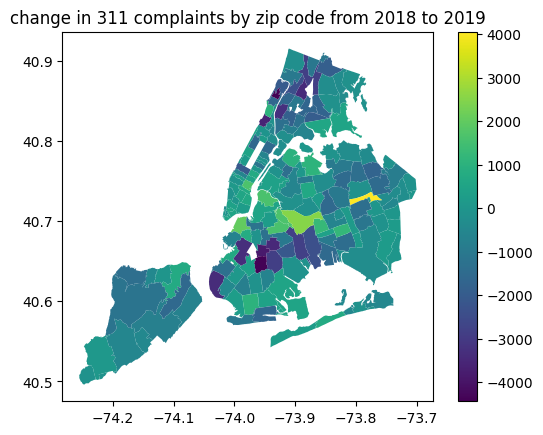

In [12]:
map_311.plot(column='2019 inc',legend=True).set(title='change in 311 complaints by zip code from 2018 to 2019')